# Part 3.1
Instead of keeping the word embeddings fixed, now update the word embeddings (the same
way as model parameters) during the training process

In [1]:
from datasets import load_dataset
from utils.rnn_model import *
from utils.rnn_utils import *
from utils.utils import *
from dotenv import load_dotenv
import os

load_dotenv()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\qkm20\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\qkm20\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\qkm20\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Data Preparation

In [2]:
BATCH_SIZE = 32
LR = 0.0001
MODEL_TYPE = "rnn"

In [3]:
dataset = load_dataset("rotten_tomatoes")
trn_dataset = dataset["train"]
val_dataset = dataset["validation"]
tst_dataset = dataset["test"]

In [4]:
sentences = trn_dataset["text"]
words = []

for i in range(len(sentences)):
    sentences[i] = simple_preprocess(sentences[i])

for sentence in sentences:
    for word in sentence:
        if word not in words:
            words.append(word)

word2vec_model1 = load_word2vec(vocab=words, filepath=r"data\embedding_matrix_oov.npy")
word2vec_model2 = load_word2vec(vocab=words, filepath=r"data\embedding_matrix_oov.npy")
word2vec_model3 = load_word2vec(vocab=words, filepath=r"data\embedding_matrix_oov.npy")
word2vec_model4 = load_word2vec(vocab=words, filepath=r"data\embedding_matrix_oov.npy")
word2vec_model5 = load_word2vec(vocab=words, filepath=r"data\embedding_matrix_oov.npy")
word2vec_model6 = load_word2vec(vocab=words, filepath=r"data\embedding_matrix_oov.npy")

In [5]:
word_index = {
    word: i for i, word in enumerate(
        word2vec_model1.index_to_key
    )
}

In [6]:
trn_sentences, trn_labels = prepare_data(
    trn_dataset["text"],
    trn_dataset["label"],
    word_index=word_index
)
val_sentences, val_labels = prepare_data(
    val_dataset["text"],
    val_dataset["label"],
    word_index=word_index
)
tst_sentences, tst_labels = prepare_data(
    tst_dataset["text"],
    tst_dataset["label"],
    word_index=word_index
)

In [7]:
trn_dataloader = create_dataloader(
    trn_sentences,
    trn_labels,
    BATCH_SIZE,
    shuffle=True)
val_dataloader = create_dataloader(
    val_sentences,
    val_labels,
    BATCH_SIZE,
    shuffle=False)
tst_dataloader = create_dataloader(
    tst_sentences,
    tst_labels,
    BATCH_SIZE,
    shuffle=False)

# Models

## Default Model

In [8]:
model = RNNModel(
    embedding_dim=350,
    hidden_size=128,
    embedding_matrix=word2vec_model1.vectors,
    rnn_type=MODEL_TYPE,
    freeze_embeddings=False,  # Set to False to make embeddings trainable
    bidirectional=False,
    num_layers=1,
)

In [9]:
losses, accuracies = train(
    model=model,
    trn_dataloader=trn_dataloader,
    val_dataloader=val_dataloader,
    version="2",
    model_type=MODEL_TYPE,
    model_save_path=os.getenv("MODEL_SAVE_PATH", "modelfiles/"),
    optimizer=torch.optim.Adam(model.parameters(), lr=LR),
    epochs=100,
    early_stopping_patience=10,
    train_mode=None
)

Epoch   1/100, Loss: 0.6943, Accuracy: 0.4925
Model saved.
Epoch   2/100, Loss: 0.6889, Accuracy: 0.4981
Model saved.
Epoch   3/100, Loss: 0.6768, Accuracy: 0.5553
Model saved.
Epoch   4/100, Loss: 0.6029, Accuracy: 0.6782
Model saved.
Epoch   5/100, Loss: 0.4463, Accuracy: 0.7064
Model saved.
Epoch   6/100, Loss: 0.3266, Accuracy: 0.6989
Epoch   7/100, Loss: 0.2492, Accuracy: 0.6951
Epoch   8/100, Loss: 0.1820, Accuracy: 0.7129
Model saved.
Epoch   9/100, Loss: 0.1381, Accuracy: 0.6998
Epoch  10/100, Loss: 0.1053, Accuracy: 0.7129
Epoch  11/100, Loss: 0.0822, Accuracy: 0.7008
Epoch  12/100, Loss: 0.0628, Accuracy: 0.7045
Epoch  13/100, Loss: 0.0444, Accuracy: 0.7101
Epoch  14/100, Loss: 0.0350, Accuracy: 0.7036
Epoch  15/100, Loss: 0.0277, Accuracy: 0.7054
Epoch  16/100, Loss: 0.0223, Accuracy: 0.7026
Epoch  17/100, Loss: 0.0211, Accuracy: 0.7017
Epoch  18/100, Loss: 0.0127, Accuracy: 0.7064
Early stopping triggered after 18 epochs.
Training ended, loading best model...
Model loaded.


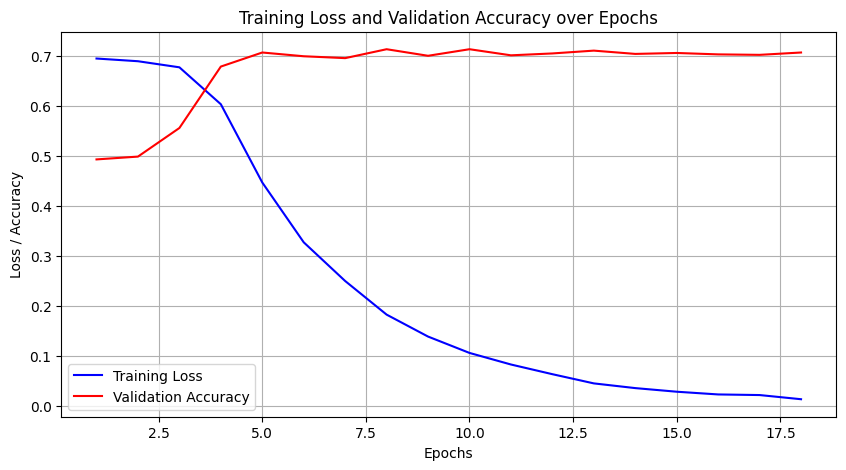

In [10]:
plot_loss_accuracy(losses, accuracies)

In [11]:
rnn_tst_accuracy = validate(model, tst_dataloader)

Accuracy: 0.7355


## Last State Model

In [12]:
model = RNNModel(
    embedding_dim=350,
    hidden_size=128,
    embedding_matrix=word2vec_model1.vectors,
    rnn_type=MODEL_TYPE,
    freeze_embeddings=False,  # Set to False to make embeddings trainable
    bidirectional=False,
    num_layers=1,
)

In [13]:
losses, accuracies = train(
    model=model,
    trn_dataloader=trn_dataloader,
    val_dataloader=val_dataloader,
    version="2",
    model_type=MODEL_TYPE,
    model_save_path=os.getenv("MODEL_SAVE_PATH", "modelfiles/"),
    optimizer=torch.optim.Adam(model.parameters(), lr=LR),
    epochs=100,
    early_stopping_patience=10,
    train_mode="last_state"
)

Epoch   1/100, Loss: 0.6934, Accuracy: 0.5375
Model saved.
Epoch   2/100, Loss: 0.6878, Accuracy: 0.5319
Epoch   3/100, Loss: 0.6654, Accuracy: 0.6201
Model saved.
Epoch   4/100, Loss: 0.5611, Accuracy: 0.6979
Model saved.
Epoch   5/100, Loss: 0.4153, Accuracy: 0.6979
Epoch   6/100, Loss: 0.3052, Accuracy: 0.7054
Model saved.
Epoch   7/100, Loss: 0.2294, Accuracy: 0.6970
Epoch   8/100, Loss: 0.1639, Accuracy: 0.6970
Epoch   9/100, Loss: 0.1266, Accuracy: 0.7073
Model saved.
Epoch  10/100, Loss: 0.0948, Accuracy: 0.6895
Epoch  11/100, Loss: 0.0720, Accuracy: 0.6914
Epoch  12/100, Loss: 0.0571, Accuracy: 0.6998
Epoch  13/100, Loss: 0.0444, Accuracy: 0.7129
Model saved.
Epoch  14/100, Loss: 0.0291, Accuracy: 0.6989
Epoch  15/100, Loss: 0.0218, Accuracy: 0.7036
Epoch  16/100, Loss: 0.0183, Accuracy: 0.6857
Epoch  17/100, Loss: 0.0163, Accuracy: 0.6970
Epoch  18/100, Loss: 0.0090, Accuracy: 0.6970
Epoch  19/100, Loss: 0.0082, Accuracy: 0.6820
Epoch  20/100, Loss: 0.0097, Accuracy: 0.6801
Ep

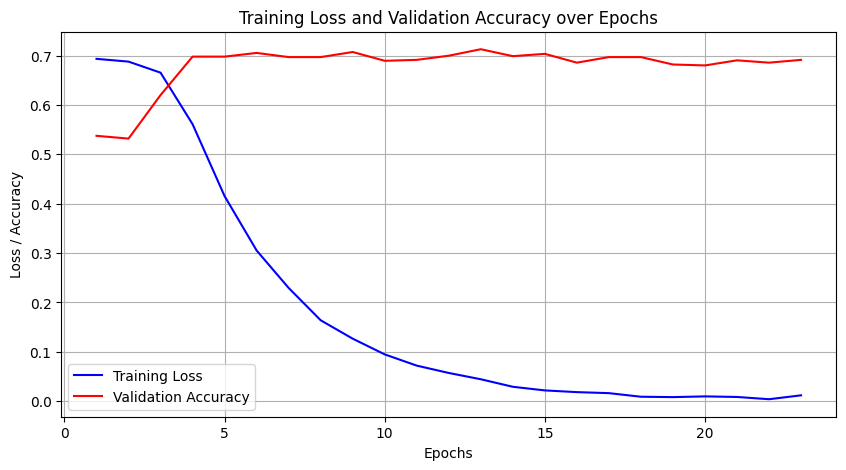

In [14]:
plot_loss_accuracy(losses, accuracies)

In [15]:
last_tst_accuracy = validate(model, tst_dataloader)

Accuracy: 0.7186


## Mean Pool Model

In [16]:
model = RNNModel(
    embedding_dim=350,
    hidden_size=128,
    embedding_matrix=word2vec_model1.vectors,
    rnn_type=MODEL_TYPE,
    freeze_embeddings=False,  # Set to False to make embeddings trainable
    bidirectional=False,
    num_layers=1,
)

In [17]:
losses, accuracies = train(
    model=model,
    trn_dataloader=trn_dataloader,
    val_dataloader=val_dataloader,
    version="2",
    model_type=MODEL_TYPE,
    model_save_path=os.getenv("MODEL_SAVE_PATH", "modelfiles/"),
    optimizer=torch.optim.Adam(model.parameters(), lr=LR),
    epochs=100,
    early_stopping_patience=10,
    train_mode="mean_pool"
)

Epoch   1/100, Loss: 0.6971, Accuracy: 0.4953
Model saved.
Epoch   2/100, Loss: 0.6921, Accuracy: 0.5113
Model saved.
Epoch   3/100, Loss: 0.6849, Accuracy: 0.5113
Epoch   4/100, Loss: 0.6487, Accuracy: 0.6557
Model saved.
Epoch   5/100, Loss: 0.5036, Accuracy: 0.6876
Model saved.
Epoch   6/100, Loss: 0.3583, Accuracy: 0.7158
Model saved.
Epoch   7/100, Loss: 0.2613, Accuracy: 0.6989
Epoch   8/100, Loss: 0.1904, Accuracy: 0.6979
Epoch   9/100, Loss: 0.1431, Accuracy: 0.6932
Epoch  10/100, Loss: 0.1109, Accuracy: 0.7073
Epoch  11/100, Loss: 0.0825, Accuracy: 0.6998
Epoch  12/100, Loss: 0.0642, Accuracy: 0.6923
Epoch  13/100, Loss: 0.0475, Accuracy: 0.6951
Epoch  14/100, Loss: 0.0340, Accuracy: 0.6942
Epoch  15/100, Loss: 0.0268, Accuracy: 0.7026
Epoch  16/100, Loss: 0.0246, Accuracy: 0.6932
Early stopping triggered after 16 epochs.
Training ended, loading best model...
Model loaded.


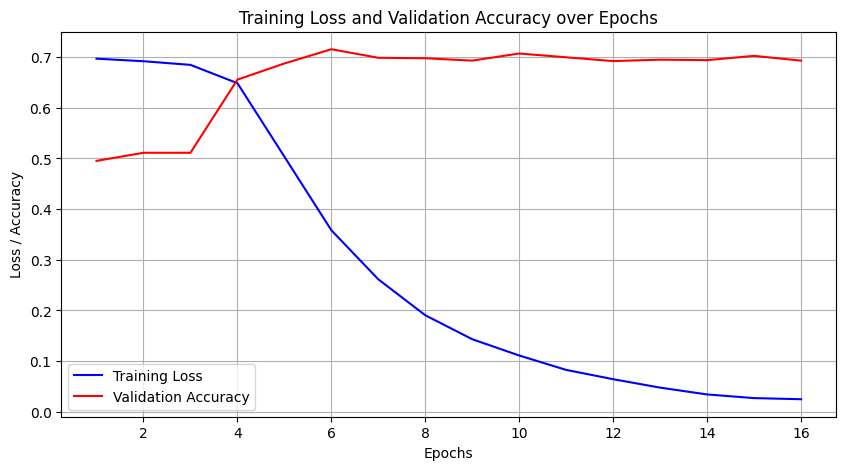

In [18]:
plot_loss_accuracy(losses, accuracies)

In [19]:
max_tst_accuracy = validate(model, tst_dataloader)

Accuracy: 0.7186


## Max Pool Model

In [20]:
model = RNNModel(
    embedding_dim=350,
    hidden_size=128,
    embedding_matrix=word2vec_model1.vectors,
    rnn_type=MODEL_TYPE,
    freeze_embeddings=False,  # Set to False to make embeddings trainable
    bidirectional=False,
    num_layers=1,
)

In [21]:
losses, accuracies = train(
    model=model,
    trn_dataloader=trn_dataloader,
    val_dataloader=val_dataloader,
    version="2",
    model_type=MODEL_TYPE,
    model_save_path=os.getenv("MODEL_SAVE_PATH", "modelfiles/"),
    optimizer=torch.optim.Adam(model.parameters(), lr=LR),
    epochs=100,
    early_stopping_patience=10,
    train_mode="max_pool"
)

Epoch   1/100, Loss: 0.6955, Accuracy: 0.4859
Model saved.
Epoch   2/100, Loss: 0.6898, Accuracy: 0.5122
Model saved.
Epoch   3/100, Loss: 0.6518, Accuracy: 0.6595
Model saved.
Epoch   4/100, Loss: 0.5251, Accuracy: 0.7054
Model saved.
Epoch   5/100, Loss: 0.3851, Accuracy: 0.7242
Model saved.
Epoch   6/100, Loss: 0.2916, Accuracy: 0.7073
Epoch   7/100, Loss: 0.2238, Accuracy: 0.6979
Epoch   8/100, Loss: 0.1717, Accuracy: 0.6970
Epoch   9/100, Loss: 0.1358, Accuracy: 0.7092
Epoch  10/100, Loss: 0.1041, Accuracy: 0.6961
Epoch  11/100, Loss: 0.0858, Accuracy: 0.6979
Epoch  12/100, Loss: 0.0661, Accuracy: 0.6857
Epoch  13/100, Loss: 0.0575, Accuracy: 0.6932
Epoch  14/100, Loss: 0.0494, Accuracy: 0.6876
Epoch  15/100, Loss: 0.0384, Accuracy: 0.6867
Early stopping triggered after 15 epochs.
Training ended, loading best model...
Model loaded.


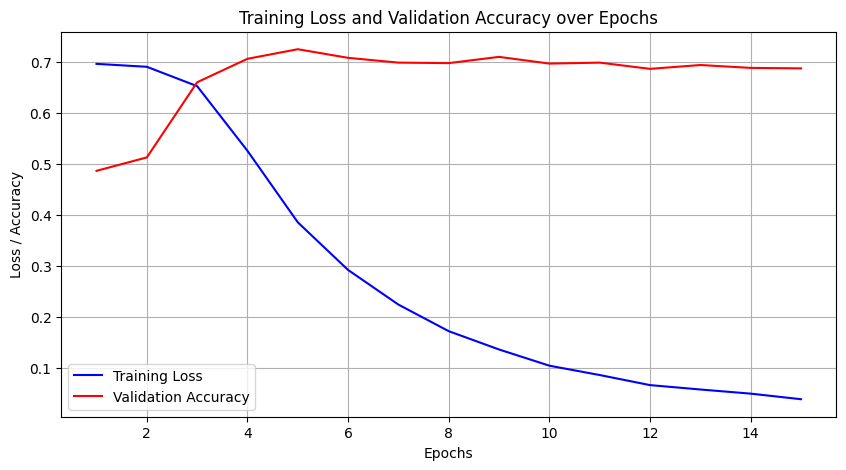

In [22]:
plot_loss_accuracy(losses, accuracies)

In [23]:
mean_tst_accuracy = validate(model, tst_dataloader)

Accuracy: 0.7298


## Mean Max Pool Model

In [24]:
model = RNNModel(
    embedding_dim=350,
    hidden_size=128,
    embedding_matrix=word2vec_model2.vectors,
    rnn_type=MODEL_TYPE,
    freeze_embeddings=False,  # Set to False to make embeddings trainable
    bidirectional=False,
    num_layers=1,
)

In [25]:
losses, accuracies = train(
    model=model,
    trn_dataloader=trn_dataloader,
    val_dataloader=val_dataloader,
    version="2",
    model_type=MODEL_TYPE,
    model_save_path=os.getenv("MODEL_SAVE_PATH", "modelfiles/"),
    optimizer=torch.optim.Adam(model.parameters(), lr=LR),
    epochs=100,
    early_stopping_patience=10,
    train_mode="mean_max"
)

Epoch   1/100, Loss: 0.6944, Accuracy: 0.5019
Model saved.
Epoch   2/100, Loss: 0.6901, Accuracy: 0.5141
Model saved.
Epoch   3/100, Loss: 0.6822, Accuracy: 0.5131
Epoch   4/100, Loss: 0.6510, Accuracy: 0.6388
Model saved.
Epoch   5/100, Loss: 0.5394, Accuracy: 0.6811
Model saved.
Epoch   6/100, Loss: 0.3802, Accuracy: 0.7073
Model saved.
Epoch   7/100, Loss: 0.2572, Accuracy: 0.6876
Epoch   8/100, Loss: 0.1751, Accuracy: 0.7083
Model saved.
Epoch   9/100, Loss: 0.1167, Accuracy: 0.6998
Epoch  10/100, Loss: 0.0778, Accuracy: 0.6782
Epoch  11/100, Loss: 0.0526, Accuracy: 0.6839
Epoch  12/100, Loss: 0.0411, Accuracy: 0.6886
Epoch  13/100, Loss: 0.0258, Accuracy: 0.6886
Epoch  14/100, Loss: 0.0266, Accuracy: 0.6632
Epoch  15/100, Loss: 0.0184, Accuracy: 0.6904
Epoch  16/100, Loss: 0.0096, Accuracy: 0.6848
Epoch  17/100, Loss: 0.0109, Accuracy: 0.6867
Epoch  18/100, Loss: 0.0047, Accuracy: 0.6726
Early stopping triggered after 18 epochs.
Training ended, loading best model...
Model loaded.


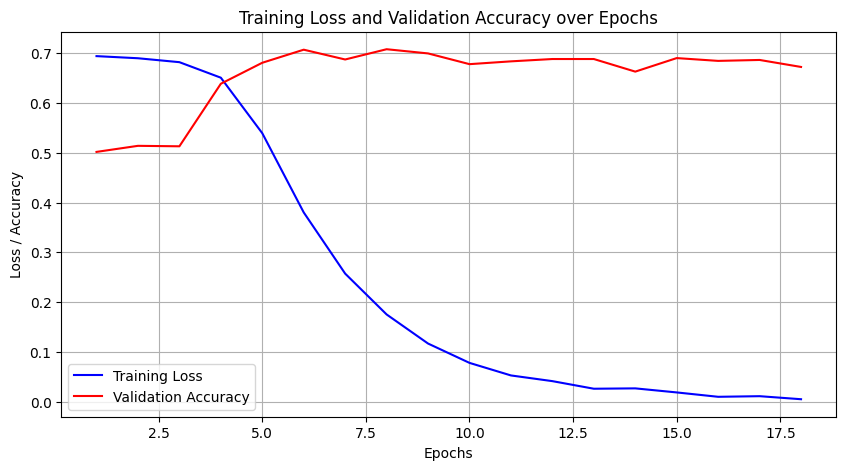

In [26]:
plot_loss_accuracy(losses, accuracies)

In [27]:
mean_max_tst_accuracy = validate(model, tst_dataloader)

Accuracy: 0.7205


## Attention Model

In [28]:
model = RNNModel(
    embedding_dim=350,
    hidden_size=128,
    embedding_matrix=word2vec_model3.vectors,
    rnn_type=MODEL_TYPE,
    freeze_embeddings=False,  # Set to False to make embeddings trainable
    bidirectional=False,
    num_layers=1,
)

In [29]:
losses, accuracies = train(
    model=model,
    trn_dataloader=trn_dataloader,
    val_dataloader=val_dataloader,
    version="2",
    model_type=MODEL_TYPE,
    model_save_path=os.getenv("MODEL_SAVE_PATH", "modelfiles/"),
    optimizer=torch.optim.Adam(model.parameters(), lr=LR),
    epochs=100,
    early_stopping_patience=10,
    train_mode="attention"
)

Epoch   1/100, Loss: 0.6950, Accuracy: 0.5094
Model saved.
Epoch   2/100, Loss: 0.6906, Accuracy: 0.5141
Model saved.
Epoch   3/100, Loss: 0.6830, Accuracy: 0.5075
Epoch   4/100, Loss: 0.6524, Accuracy: 0.6445
Model saved.
Epoch   5/100, Loss: 0.5250, Accuracy: 0.6895
Model saved.
Epoch   6/100, Loss: 0.3667, Accuracy: 0.7111
Model saved.
Epoch   7/100, Loss: 0.2535, Accuracy: 0.7026
Epoch   8/100, Loss: 0.1764, Accuracy: 0.6886
Epoch   9/100, Loss: 0.1216, Accuracy: 0.6951
Epoch  10/100, Loss: 0.0836, Accuracy: 0.6970
Epoch  11/100, Loss: 0.0596, Accuracy: 0.6942
Epoch  12/100, Loss: 0.0429, Accuracy: 0.6951
Epoch  13/100, Loss: 0.0278, Accuracy: 0.6895
Epoch  14/100, Loss: 0.0242, Accuracy: 0.6998
Epoch  15/100, Loss: 0.0154, Accuracy: 0.7017
Epoch  16/100, Loss: 0.0153, Accuracy: 0.6979
Early stopping triggered after 16 epochs.
Training ended, loading best model...
Model loaded.


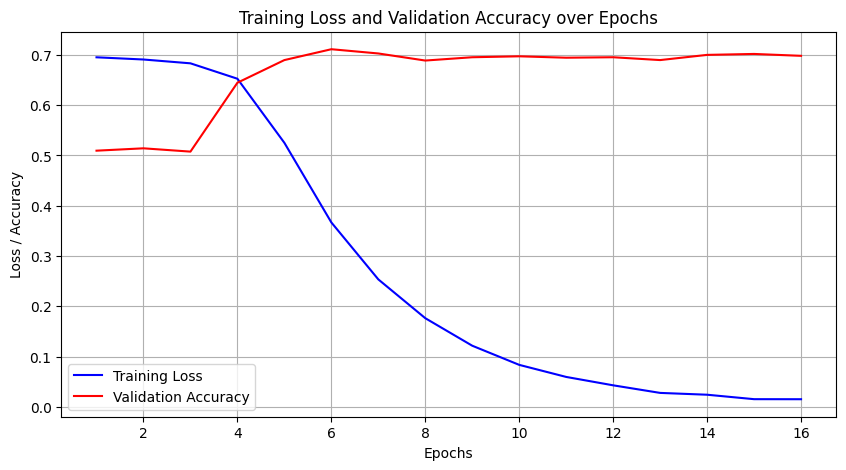

In [30]:
plot_loss_accuracy(losses, accuracies)

In [31]:
attn_tst_accuracy = validate(model, tst_dataloader)

Accuracy: 0.7167


# Results

In [32]:
print(f"Default RNN Test Accuracy:      {rnn_tst_accuracy:.4f}")
print(f"Last State Test Accuracy:       {last_tst_accuracy:.4f}")
print(f"Mean Pool Test Accuracy:        {mean_tst_accuracy:.4f}")
print(f"Max Pool Test Accuracy:         {max_tst_accuracy:.4f}")
print(f"Mean Max Pool Test Accuracy:    {mean_max_tst_accuracy:.4f}")
print(f"Attention Test Accuracy:        {attn_tst_accuracy:.4f}")

Default RNN Test Accuracy:      0.7355
Last State Test Accuracy:       0.7186
Mean Pool Test Accuracy:        0.7298
Max Pool Test Accuracy:         0.7186
Mean Max Pool Test Accuracy:    0.7205
Attention Test Accuracy:        0.7167


From the above results, it is evident that training the word embeddings results in a much higher accuracy compared to not training word embeddings

| Method | Part 2 Test Accuracy | Part 3.1 Test Accuracy |
| --- | --- | --- |
| Default RNN | 0.5657 | 0.7355 |
| Last State | 0.5760 | 0.7186 |
| Mean Pooling | 0.5619 | 0.7298 |
| Max Pooling | 0.5985 | 0.7186 |
| Mean Max Pooling | 0.5947 | 0.7205 |
| Attention Mask | 0.6135 | 0.7167 |